# Industrial Gold Refinement Process Optimization

The goal of this project is to help a mineral extraction company optimize their gold refinement process using machine learning.

The dataset includes information about different stages of the gold refinement process. Different ML models will be compared to choose the one that is most effective in predicting gold content in the final product, and the most successful model will then be used to aid in the company in the optimization process. The primary metric used for assessing model performance was SMAPE. The data was received with missing values and other such imperfections; because of this, the data will be cleaned and an exploratory analysis will be performed before training and choosing ML models.


This project was completed relatively early in the education process, and because of this the results are not as satisfactory as they might have been. Most notably, this concerns model parameters and training.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Импорты</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Предотработка:-общие-выводы" data-toc-modified-id="Предотработка:-общие-выводы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предотработка: общие выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

### Импорты

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor



## Подготовка данных

In [40]:
try:
    
    gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
except:
    
    gold_train = pd.read_csv('datasets/gold_recovery_train_new.csv')
    gold_test = pd.read_csv('datasets/gold_recovery_test_new.csv')
    gold_full = pd.read_csv('datasets/gold_recovery_full_new.csv')


In [41]:
gold_train.info()
display(gold_train.describe().T)

gold_test.info()
display(gold_test.describe().T)

display(gold_full.describe().T)
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035


,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


*Информация из следующей ячейки пригодилась мне ниже в проекте, но надо было поставить ячейку до обработки данных.*
    

In [42]:
test_for_missing_model_data_df = gold_train[[col for col in gold_train.columns if col in gold_test.columns]]
test_for_missing_model_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

In [43]:
recovery_check_rougher = (
    (gold_train['rougher.output.concentrate_au']*(gold_train['rougher.input.feed_au']
        -gold_train['rougher.output.tail_au']))/(gold_train['rougher.input.feed_au']*
        (gold_train['rougher.output.concentrate_au']-gold_train['rougher.output.tail_au']))*100
)


In [44]:
recovery_acc = mae(recovery_check_rougher, gold_train['rougher.output.recovery'])
print(f'''
MAE между эффективностью обозащения рассчитанной мною и эффективностью обогащения как показанной в таблице:
{recovery_acc}
''')



MAE между эффективностью обозащения рассчитанной мною и эффективностью обогащения как показанной в таблице:
9.73512347450521e-15



#### Выводы

rougher.output.recovery достаточно точный. Не уверен, почему есть низкий уровень погрешности, но он крайне низкий – можно считать, что rougher.output.recovery правильно рассчитан.

In [45]:
diff = list(set(gold_train.columns) ^ set(gold_test.columns))
display(pd.Series(diff).sort_values().to_frame())
print(len(diff))

,0
9,final.output.concentrate_ag
32,final.output.concentrate_au
26,final.output.concentrate_pb
3,final.output.concentrate_sol
10,final.output.recovery
2,final.output.tail_ag
18,final.output.tail_au
22,final.output.tail_pb
15,final.output.tail_sol
8,primary_cleaner.output.concentrate_ag


34


#### Выводы

В gold_test нет 34 столбцов, которые присутствуют в gold_train. Все эти столбцы соответствуют либо типу ".output" (30/34), либо типу ".calculation" (4/34). В описании написано, что некоторые параметры замеряются значительно позже – логично, чтобы признаки типа ".output" были из тех. Признаки типа ".calculation" зависят от признаков типа ".output", поэтому логично, что они тоже отсутствуют.

Не кажется, что отсутствуют какие-либо данные, которые уже должны быть в таблице – можно считать датасет целым.

### Обработка пропусков

Есть достаточно большое количество пропусков в gold_train.

Судя по .info, большинство пропусков в столбцах связанных с \_sol (коллоидный раствор?), \_xanthate (ксантогенаты), \_air (воздух). Точное значение нам не помогает, но стоит отметить, что есть такие тенденции потому, что возможно такая информация поможет позже в проекте.

В описании проекта написано, что "Соседние по времени параметры часто похожи." Поэтому, вместо .median или .mean, лучше будет выполнить пропуски с помощью .ffill.


В gold_test значительно меньше пропусков, только по нескольку в каждом столбце с пропусками. .ffill тоже верный метод для замены пропусков здесь.

In [46]:
gold_train['date'] = pd.to_datetime(gold_train['date'], infer_datetime_format=True)

In [47]:
gold_train = gold_train.ffill()
gold_test = gold_test.ffill()

### Предотработка: общие выводы

Предотработка успешно проведена.

- Проверена на точность данные об эффективности обогащения в rougher.output.recovery
- данные в 'date' переведены на тип datetime
- пропуски выполнены
    - к тому же, большое количество пропусков находится в столбцах, которые не присутствуют в gold_test – они в любом случае не будут использованы в конечном предсказывании эффективности обогащения

## Анализ данных

In [48]:
ag_list = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ]
pb_list = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ]
sol_list = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol' ]
au_list = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ]
elems_list = ag_list+pb_list+sol_list+au_list
display(gold_train[elems_list].describe().T)

rougher_input_list = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_output_list = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
primary_output_list = ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']
final_output_list = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_ag,14149.0,8.579195,1.896284,0.01,7.132802,8.156092,9.918304,14.596026
rougher.output.concentrate_ag,14149.0,11.775812,2.731747,0.00,10.486871,11.747362,13.426419,24.480271
primary_cleaner.output.concentrate_ag,14149.0,8.200916,2.005185,0.00,7.107126,8.226247,9.504924,16.081632
final.output.concentrate_ag,14149.0,5.141921,1.369603,0.00,4.211500,4.994607,5.859495,16.001945
rougher.input.feed_pb,14149.0,3.505465,1.090064,0.01,2.766515,3.414267,4.220115,7.142594
rougher.output.concentrate_pb,14149.0,7.664555,1.856279,0.00,6.850501,7.760435,8.601927,13.617072
primary_cleaner.output.concentrate_pb,14149.0,9.568544,2.709330,0.00,8.315997,9.920598,11.298487,17.081278
final.output.concentrate_pb,14149.0,10.132848,1.654925,0.00,9.296833,10.297013,11.170578,17.031899
rougher.input.feed_sol,14149.0,36.290933,4.977652,0.01,34.086892,37.008684,39.410720,48.363177
rougher.output.concentrate_sol,14149.0,28.292820,6.119659,0.00,26.696213,29.254966,31.743943,38.351193


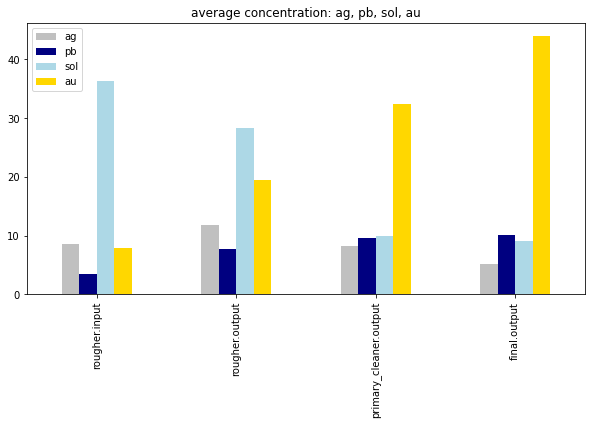

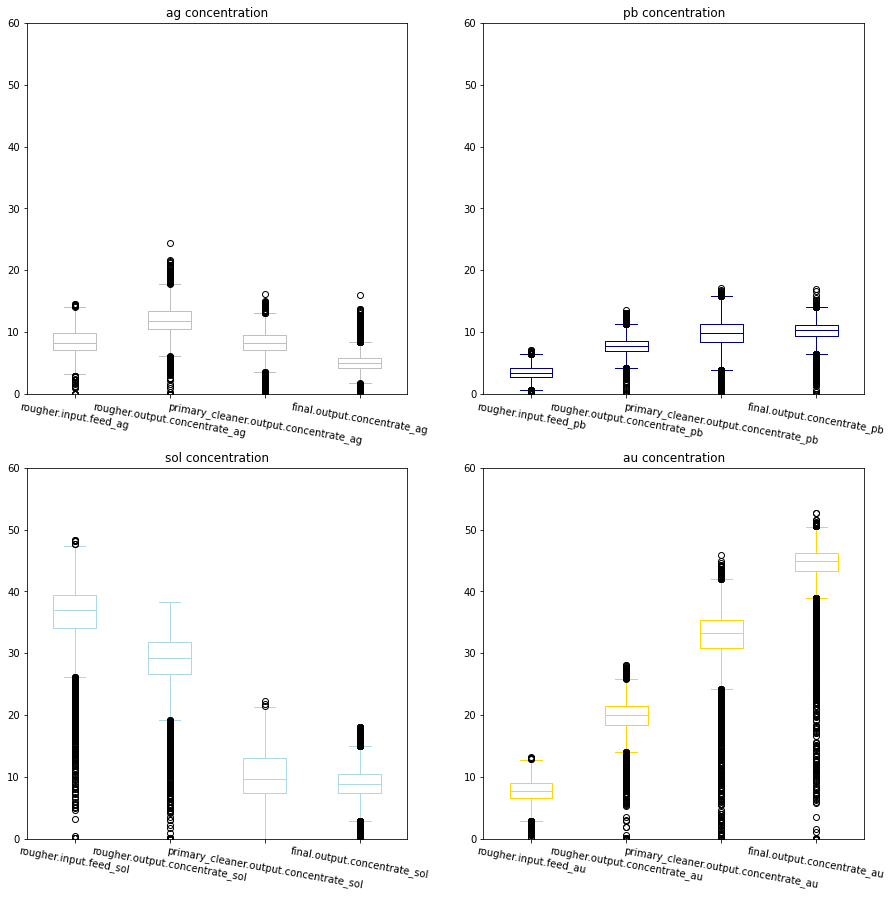

In [49]:
levels_df = pd.DataFrame({
    'rougher.input': gold_train[rougher_input_list].mean().values,
    'rougher.output': gold_train[rougher_output_list].mean().values,
    'primary_cleaner.output': gold_train[primary_output_list].mean().values,
    'final.output': gold_train[final_output_list].mean().values
    
}, index = ['ag', 'pb', 'sol', 'au'])

fig, ax = plt.subplots(figsize=(10,5))
levels_df.T.plot(kind='bar', ax=ax, color=['silver', 'navy', 'lightblue', 'gold'], 
                 title='average concentration: ag, pb, sol, au')
plt.show()

fig2, axs = plt.subplots(2,2, figsize=(15,15))

gold_train[ag_list].plot(kind='box', color='silver', ax=axs[0,0], rot=-10, title='ag concentration', ylim=(0,60))
gold_train[pb_list].plot(kind='box', color='navy', ax=axs[0,1], rot=-10, title='pb concentration', ylim=(0,60))
gold_train[sol_list].plot(kind='box', color='lightblue', ax=axs[1,0], rot=-10, title='sol concentration', ylim=(0,60))
gold_train[au_list].plot(kind='box', color='gold', ax=axs[1,1], rot=-10, title='au concentration', ylim=(0,60))


plt.show()

**Выводы**

Главная задача для компании – обогащение золотой руды, то есть увеличение консентрации золота. Анализ изменений концентраций четырёх элементов показывает, что:

- концентрация золота постепенно увеличивается
- концентрация серебра в целом снижается (при первом этапе обработки, концентрация увеличивается)
- концентрация свинца постепенно увеличивается, но гораздо менее сильно, чем концентрация золота
- концентрация sol (коллоидный раствор?) постепенно уменьшается
- самые значительные изменения: уменьшение концентрации sol и увеличивание концентрации золота



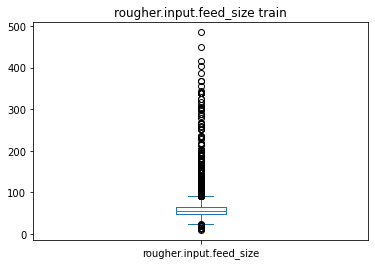

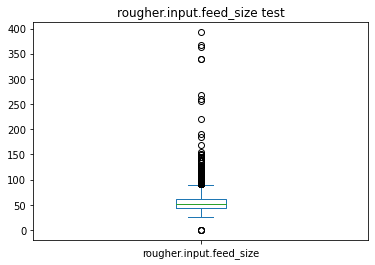

,rougher.input.feed_size
count,14149.000000
mean,60.239856
std,23.005310
min,9.659576
25%,48.966751
50%,55.269784
75%,66.007526
max,484.967466


,rougher.input.feed_size
count,5290.000000
mean,55.952754
std,19.080334
min,0.046369
25%,43.906504
50%,50.846843
75%,62.451165
max,392.494040


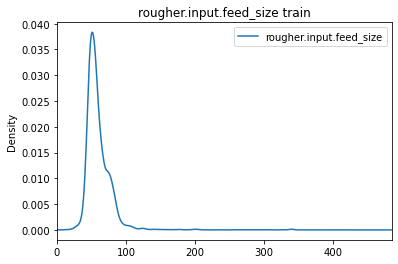

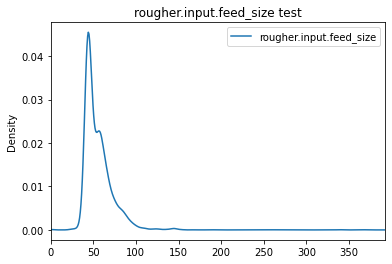


    Гипотеза H0: Размер гранул сырья в rougher.input.feed_size одинаковый в обучающей и тестовой выборках
    Гипотеза H1: Размер гранул сырья в rougher.input.feed_size отличается в обучающей и тестовой выборках
    
P-value: 3.134338776805464e-39
Гипотеза H0 отвергается.


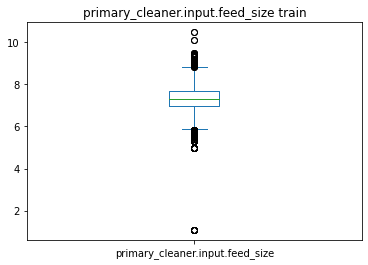

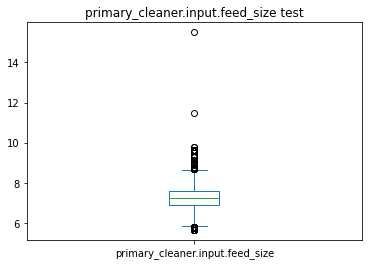

,primary_cleaner.input.feed_size
count,14149.000000
mean,7.322310
std,0.614062
min,1.080000
25%,6.960000
50%,7.290000
75%,7.700000
max,10.470000


,primary_cleaner.input.feed_size
count,5290.000000
mean,7.266339
std,0.610219
min,5.650000
25%,6.890000
50%,7.250000
75%,7.600000
max,15.500000


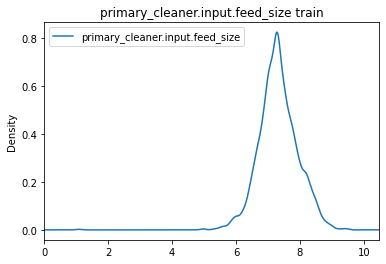

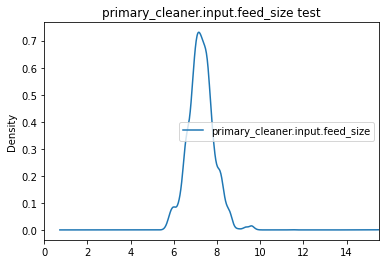


    Гипотеза H0: Размер гранул сырья в primary_cleaner.input.feed_size одинаковый в обучающей и тестовой выборках
    Гипотеза H1: Размер гранул сырья в primary_cleaner.input.feed_size отличается в обучающей и тестовой выборках
    
P-value: 1.3721938409942596e-08
Гипотеза H0 отвергается.


In [50]:
alpha_feed = 0.05
for feed in ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']:
    gold_train[feed].plot(kind='box', title=f'{feed} train')
    plt.show()
    gold_test[feed].plot(kind='box', title=f'{feed} test')
    plt.show()
    display(gold_train[feed].describe().to_frame())
    display(gold_test[feed].describe().to_frame())
    gold_train[feed].plot(kind='density', legend=True, title=f'{feed} train', xlim=(0, gold_train[feed].max()))
    plt.show()
    gold_test[feed].plot(kind='density', legend=True, title=f'{feed} test', xlim=(0, gold_test[feed].max()))
    plt.show()
    results = st.ttest_ind(gold_train[feed], gold_test[feed], equal_var=False)
    print(
    f'''
    Гипотеза H0: Размер гранул сырья в {feed} одинаковый в обучающей и тестовой выборках
    Гипотеза H1: Размер гранул сырья в {feed} отличается в обучающей и тестовой выборках
    '''
    )
    print(f'P-value: {results.pvalue}')
    if results.pvalue < alpha_feed:
        print(f'Гипотеза H0 отвергается.')
    else:
        print(f'Гипотеза H0 не отвергается.')
    


**Выводы**

Здесь анализ оказался интересным.

С моей, человеческой точки зрения, нет значительной разницы между распределениями размеров гранул сырья на обучающей и тестовой выборках. Если смотреть или на резюме данных .describe, или на графики плотности, распределения кажутся похожими. Однако, я тоже использовал ttest чтобы анализировать эти данные, и результаты ttest наоборот говорили о том, что распределения отличаются.

Мы не знаем достаточно о процессе. Допустим, что есть различия между распрелениями, но достаточно значительны ли они? Например, если смотреть на primary_cleaner.input.feed_size, минимальное и максимальное значения в обучающей - 1.08 и 10.47, а в тестовой 5.65 и 15.50, а для обоих среднее около 7.3. Мне одним взглядом не кажется, что такие разницы достаточно сильны чтобы влиять на процесс обогащения и следовательно на наш анализ этого процесса. С другой стороны, я не знаю достаточно о процессе чтобы уверенно делать такое заключение.

Для того, что касается нашего анализа, я считаю, что эти распределения не сильно отличаются друг от друга.

In [51]:
display(gold_train[elems_list].describe().T)

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_ag,14149.0,8.579195,1.896284,0.01,7.132802,8.156092,9.918304,14.596026
rougher.output.concentrate_ag,14149.0,11.775812,2.731747,0.00,10.486871,11.747362,13.426419,24.480271
primary_cleaner.output.concentrate_ag,14149.0,8.200916,2.005185,0.00,7.107126,8.226247,9.504924,16.081632
final.output.concentrate_ag,14149.0,5.141921,1.369603,0.00,4.211500,4.994607,5.859495,16.001945
rougher.input.feed_pb,14149.0,3.505465,1.090064,0.01,2.766515,3.414267,4.220115,7.142594
rougher.output.concentrate_pb,14149.0,7.664555,1.856279,0.00,6.850501,7.760435,8.601927,13.617072
primary_cleaner.output.concentrate_pb,14149.0,9.568544,2.709330,0.00,8.315997,9.920598,11.298487,17.081278
final.output.concentrate_pb,14149.0,10.132848,1.654925,0.00,9.296833,10.297013,11.170578,17.031899
rougher.input.feed_sol,14149.0,36.290933,4.977652,0.01,34.086892,37.008684,39.410720,48.363177
rougher.output.concentrate_sol,14149.0,28.292820,6.119659,0.00,26.696213,29.254966,31.743943,38.351193


In [52]:
gold_train['rougher.input.concentrate_all_elems'] = gold_train[rougher_input_list].sum(axis=1)
gold_train['rougher.output.concentrate_all_elems'] = gold_train[rougher_output_list].sum(axis=1)
gold_train['primary_cleaner.output.concentrate_all_elems'] = gold_train[primary_output_list].sum(axis=1)
gold_train['final.output.concentrate_all_elems'] = gold_train[final_output_list].sum(axis=1)

rougher_input_list.append('rougher.input.concentrate_all_elems')
rougher_output_list.append('rougher.output.concentrate_all_elems')
primary_output_list.append('primary_cleaner.output.concentrate_all_elems')
final_output_list.append('final.output.concentrate_all_elems')

outputs_all_elems_list = ['rougher.input.concentrate_all_elems', 'rougher.output.concentrate_all_elems', 'primary_cleaner.output.concentrate_all_elems', 'final.output.concentrate_all_elems']


In [53]:
outputs_all = rougher_output_list+primary_output_list+final_output_list+outputs_all_elems_list
display(gold_train[(gold_train['rougher.output.concentrate_all_elems'] == 0) | 
                   (gold_train['rougher.output.concentrate_all_elems'] == 0) |
                   (gold_train['primary_cleaner.output.concentrate_all_elems'] == 0) | 
                   (gold_train['final.output.concentrate_all_elems'] == 0)][outputs_all])


,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.concentrate_all_elems,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_all_elems,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_all_elems,rougher.input.concentrate_all_elems,rougher.output.concentrate_all_elems,primary_cleaner.output.concentrate_all_elems,final.output.concentrate_all_elems
19,10.788951,7.537074,26.092838,18.511902,62.930764,0.000000,0.000000,0.000000,0.000000,0.000000,5.658943,10.436002,5.942418,42.509402,64.546766,56.005644,62.930764,0.000000,64.546766
22,10.958096,7.267608,25.911055,18.089134,62.225893,0.000000,0.000000,0.000000,0.000000,0.000000,6.118749,10.483007,6.546983,41.406172,64.554911,56.038252,62.225893,0.000000,64.554911
30,11.574823,7.384216,25.740506,17.583602,62.283147,0.000000,0.000000,0.000000,0.000000,0.000000,5.322681,9.577672,4.805490,44.059908,63.765751,57.764677,62.283147,0.000000,63.765751
45,0.000000,0.000000,0.000000,0.000000,0.000000,8.513177,9.724797,19.120964,37.633572,74.992510,4.566664,10.406178,4.588698,46.614456,66.175996,58.602038,0.000000,74.992510,66.175996
46,0.000000,0.000000,0.000000,0.000000,0.000000,8.466262,9.780929,19.220963,37.718947,75.187102,4.577832,10.691605,5.274175,46.250638,66.794250,59.921613,0.000000,75.187102,66.794250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,0.000000,0.000000,0.000000,0.000000,0.000000,8.978113,10.463460,13.961403,34.881720,68.284696,4.909904,9.941006,8.191698,47.660737,70.703344,58.106496,0.000000,68.284696,70.703344
10331,0.000000,0.000000,0.000000,0.000000,0.000000,8.951252,10.754766,14.030272,34.803462,68.539751,4.797572,9.889303,8.326773,47.801056,70.814703,59.500740,0.000000,68.539751,70.814703
10332,0.000000,0.000000,0.000000,0.000000,0.000000,8.377929,11.010672,13.964058,36.013125,69.365785,4.329492,9.413122,8.173988,49.412576,71.329178,60.129638,0.000000,69.365785,71.329178
10333,0.000000,0.000000,0.000000,0.000000,0.000000,8.599144,11.066215,14.102301,35.557834,69.325494,4.317169,9.642271,8.396492,48.839994,71.195925,59.267147,0.000000,69.325494,71.195925


In [54]:
print(len(gold_train))
print(f'''
Процент строк тренировочной выборки, в которых суммарная концентрация (на любой стадии) равна 0:
{424/len(gold_train)*100}
''')

14149

Процент строк тренировочной выборки, в которых суммарная концентрация (на любой стадии) равна 0:
2.9966782104742387



Заметно то, что во многих из этих строк, суммарная концентрация (и соответственно концентрация всех элементов) равна 0 только на одной стадии.

С одной стороны, это значит, что наверно можно использовать данные из других стадией, чтобы предсказать отсутствующие данные. С другой стороны, эти данные в свою очередь будут использованы для предсказания эффективность обогащения. Логичным возражением тут является то, что я уже использовал .ffill чтобы обработать пропуски. Однако, я проверял, а на самом деле мало пропусков в тех столбцах, которые туж присутствуют в gold_test.

3% довольно мало для выборки, в которой 14000 строк. С учётом того, что данные будут использованы для позжего предсказания, я считаю лучше просто убрать эти строки.

In [55]:
gold_train = gold_train[(gold_train['rougher.output.concentrate_all_elems'] != 0) & 
                   (gold_train['rougher.output.concentrate_all_elems'] != 0) &
                   (gold_train['primary_cleaner.output.concentrate_all_elems'] != 0) & 
                   (gold_train['final.output.concentrate_all_elems'] != 0)]

gold_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13725 entries, 0 to 14148
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13725 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13725 non-null  float64       
 2   final.output.concentrate_pb                         13725 non-null  float64       
 3   final.output.concentrate_sol                        13725 non-null  float64       
 4   final.output.concentrate_au                         13725 non-null  float64       
 5   final.output.recovery                               13725 non-null  float64       
 6   final.output.tail_ag                                13725 non-null  float64       
 7   final.output.tail_pb                                13725 non-null  float64       
 8   final.

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.concentrate_all_elems
0,6.100378,2.284912,36.808594,6.486150,51.680034
1,6.161113,2.266033,35.753385,6.478583,50.659114
2,6.116455,2.159622,35.971630,6.362222,50.609929
3,6.043309,2.037807,36.862241,6.118189,51.061546
4,6.060915,1.786875,34.347666,5.663707,47.859163


,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.concentrate_all_elems
0,11.500771,7.101074,28.029297,19.793808,66.424950
1,11.615865,7.278807,28.067063,20.050975,67.012710
2,11.695753,7.216833,27.454037,19.737170,66.103793
3,11.915047,7.175616,27.341277,19.320810,65.752751
4,12.411054,7.240205,27.041023,19.216101,65.908382


,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_all_elems
0,8.547551,10.389648,19.529297,34.174427,72.640924
1,8.558743,10.497069,19.369147,34.118526,72.543485
2,8.603505,10.354494,19.167579,33.969464,72.095042
3,7.221879,8.496563,15.978538,28.260743,59.957723
4,9.089428,9.986786,19.199864,33.044932,71.321010


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_all_elems
0,6.055403,9.889648,5.507324,42.192020,63.644396
1,6.029369,9.968944,5.257781,42.701629,63.957723
2,6.055926,10.213995,5.383759,42.657501,64.311180
3,6.047977,9.977019,4.858634,42.689819,63.573449
4,6.148599,10.142511,4.939416,42.774141,64.004667


,rougher.input.concentrate_all_elems,rougher.output.concentrate_all_elems,primary_cleaner.output.concentrate_all_elems,final.output.concentrate_all_elems
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667


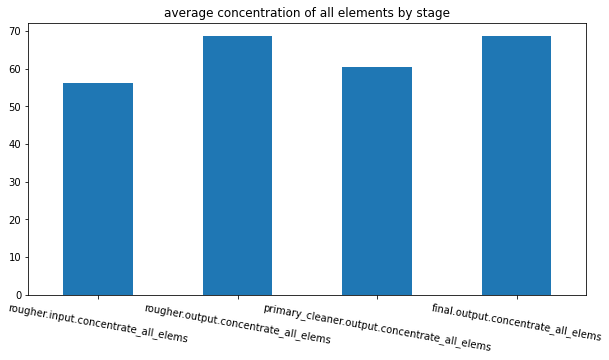

In [56]:
# gold_train['rougher.input.concentrate_all_elems'] = gold_train[rougher_input_list].sum(axis=1)
# gold_train['rougher.output.concentrate_all_elems'] = gold_train[rougher_output_list].sum(axis=1)
# gold_train['primary_cleaner.output.concentrate_all_elems'] = gold_train[primary_output_list].sum(axis=1)
# gold_train['final.output.concentrate_all_elems'] = gold_train[final_output_list].sum(axis=1)

# rougher_input_list.append('rougher.input.concentrate_all_elems')
# rougher_output_list.append('rougher.output.concentrate_all_elems')
# primary_output_list.append('primary_cleaner.output.concentrate_all_elems')
# final_output_list.append('final.output.concentrate_all_elems')

# outputs_all_elems_list = ['rougher.input.concentrate_all_elems', 'rougher.output.concentrate_all_elems', 'primary_cleaner.output.concentrate_all_elems', 'final.output.concentrate_all_elems']

display(gold_train[rougher_input_list].head())
display(gold_train[rougher_output_list].head())
display(gold_train[primary_output_list].head())
display(gold_train[final_output_list].head())
display(gold_train[outputs_all_elems_list].head())

fig, ax = plt.subplots(figsize=(10,5))
gold_train[outputs_all_elems_list].mean().plot(kind='bar', ax=ax, rot=-10, 
                                               title='average concentration of all elements by stage')
plt.show()

**Выводы**

В итоге, суммарная концентрация всех элементов не сильно отличается на разных стадиях. Это логично потому, что концентрация одних металлов уменшается одновременно с тем, как концентрация других металлов (особенно концентрация золота) увеличивается.


## Модель

In [57]:
def smape(predictions, values_act):
    n = len(values_act)
    total_sum = 0
    for pred, act in zip(predictions, values_act):
        if (pred != 0 and act != 0):
            total_sum += (abs(act-pred)/((abs(act)+pred)/2))
    smape = total_sum*100/n
    return smape
    
    
def full_smape(smape_rough, smape_final):
    return 0.25*smape_rough + 0.75*smape_final



**Подход**

Для нашей задачи, только подходят регрессоры. Я решил использовать знакомые нам регрессоры: LinearRegression, DecisionTreeRegressor, и RandomForestRegressor, чтобы найти тот, полученные результаты которого самые точные.

Я использовал только те данные, которые тоже присутствуют в gold_test. Количество здесь гораздо меньше, поэтому результаты должны быть менее точными. Однако, этот подход логчиный, поскольку не придётся перетренировать модель – мы сразу работаем с моделью, которую можно использовать чтобы предсказать нужные нам данные. Иными словами, этот подход более прагматичен и использует те данные, которые у нас уже есть.

In [60]:
rougher_df = gold_train[[col for col in gold_train.columns if col in gold_test.columns]].drop(columns='date')
rougher_target = gold_train['rougher.output.recovery']
final_df = gold_train[[col for col in gold_train.columns if col in gold_test.columns]].drop(columns='date')
final_target = gold_train['final.output.recovery']

In [61]:
final_target, final_df.shape

(0        70.541216
 1        69.266198
 2        68.116445
 3        68.347543
 4        66.927016
            ...    
 14144    73.755150
 14145    69.049291
 14146    67.002189
 14147    65.523246
 14148    70.281454
 Name: final.output.recovery, Length: 13725, dtype: float64,
 (13725, 52))

In [62]:
model_lin_test = LinearRegression()
model_bayes_test = BayesianRidge()
model_tree_test = DecisionTreeRegressor(max_depth=5)
model_forest_test = RandomForestRegressor(n_estimators=20, max_depth=5)

lin_smapes = []
bayes_smapes = []
tree_smapes = []
forest_smapes = []

kf = KFold(n_splits=5, random_state=12345, shuffle=True)
for train, test in kf.split(rougher_df, rougher_target):
    feat_train_rough, feat_test_rough = rougher_df.iloc[train], rougher_df.iloc[test]
    target_train_rough, target_test_rough = rougher_target.iloc[train], rougher_target.iloc[test]
    feat_train_final, feat_test_final = final_df.iloc[train], final_df.iloc[test]
    target_train_final, target_test_final = final_target.iloc[train], final_target.iloc[test]
    
    model_lin_test.fit(feat_train_rough, target_train_rough)
    predictions_lin_rough = model_lin_test.predict(feat_test_rough)
    model_lin_test.fit(feat_train_final, target_train_final)
    predictions_lin_final = model_lin_test.predict(feat_test_final)
    smape_lin_rough = smape(predictions_lin_rough, target_test_rough)
    smape_lin_final = smape(predictions_lin_final, target_test_final)
    lin_smapes.append(full_smape(smape_lin_rough, smape_lin_final))
    
    model_bayes_test.fit(feat_train_rough, target_train_rough)
    predictions_bayes_rough = model_bayes_test.predict(feat_test_rough)
    model_bayes_test.fit(feat_train_final, target_train_final)
    predictions_bayes_final = model_bayes_test.predict(feat_test_final)
    smape_bayes_rough = smape(predictions_bayes_rough, target_test_rough)
    smape_bayes_final = smape(predictions_bayes_final, target_test_final)
    bayes_smapes.append(full_smape(smape_bayes_rough, smape_bayes_final))
    
    model_tree_test.fit(feat_train_rough, target_train_rough)
    predictions_tree_rough = model_tree_test.predict(feat_test_rough)
    model_tree_test.fit(feat_train_final, target_train_final)
    predictions_tree_final = model_tree_test.predict(feat_test_final)
    smape_tree_rough = smape(predictions_tree_rough, target_test_rough)
    smape_tree_final = smape(predictions_tree_final, target_test_final)
    tree_smapes.append(full_smape(smape_tree_rough, smape_tree_final))
    
    model_forest_test.fit(feat_train_rough, target_train_rough)
    predictions_forest_rough = model_forest_test.predict(feat_test_rough)
    model_forest_test.fit(feat_train_final, target_train_final)
    predictions_forest_final = model_forest_test.predict(feat_test_final)
    smape_forest_rough = smape(predictions_forest_rough, target_test_rough)
    smape_forest_final = smape(predictions_forest_final, target_test_final)
    forest_smapes.append(full_smape(smape_forest_rough, smape_forest_final))
    
    
    
smapes_df = pd.DataFrame({
    'linear_smapes': lin_smapes,
    'bayes_smapes' : bayes_smapes,
    'tree_regressor_smapes' : tree_smapes,
    'forest_regressor_smapes': forest_smapes
})  

smapes_df = smapes_df.transpose()
smapes_df['average'] = smapes_df.mean(axis=1)
display(smapes_df)

,0,1,2,3,4,average
linear_smapes,7.190183,7.164721,7.032529,7.484060,7.229069,7.220112
bayes_smapes,7.182173,7.158042,7.025069,7.468373,7.228173,7.212366
tree_regressor_smapes,7.064368,6.987257,7.041403,7.346225,7.091867,7.106224
forest_regressor_smapes,6.687776,6.632343,6.694392,6.954165,6.809823,6.755700


In [63]:
target_test_rough

0        87.107763
5        88.156912
7        87.668336
12       89.299981
20       86.582578
           ...    
14117    87.867172
14119    88.772782
14130    90.384753
14133    90.466483
14141    87.684717
Name: rougher.output.recovery, Length: 2745, dtype: float64

Поскольку у RandomForestRegressor самые точные результаты, нужно проверить гипрепараметры, чтобы сделать модель ещё эффективнее.


Заметка: Я сделал это несколько раз, а всегда потребовало достаточно много времени (сначала около трёх минут, а один раз даже около семи), поэтому я изменил цикл, чтобы  питон быстрее выполнял ячейку. В самом начале, цикл начал так:

    for trees in [10, 90, 10]:
        for depth in [3, 10]:
    
А потом я подправил пару раз.

Чтобы не тратить время, вот результаты последнего варианта (а код в следующей ячейке закомментировал):

4.965162109743748 RandomForestRegressor(max_depth=11, n_estimators=90)


In [64]:
# %%time
# best_forest_smape = 100
# best_forest_model = None
# for trees in [70, 110, 20]:
#     for depth in [9, 11, 2]:
#         model = RandomForestRegressor(n_estimators=trees, max_depth=depth)
#         model.fit(rougher_df, rougher_target)
#         preds_rough = model.predict(rougher_df)
#         model.fit(rougher_df, final_target)
#         preds_final = model.predict(rougher_df)
#         smape_forest_rough = smape(preds_rough, rougher_target)
#         smape_forest_final = smape(preds_final, final_target)
#         forest_smape = full_smape(smape_forest_rough, smape_forest_final)
#         if forest_smape < best_forest_smape:
#             best_forest_smape = forest_smape
#             best_forest_model = model
            
# print(best_forest_smape, best_forest_model)
        

**Выводы**

Я нашёл, что RandomForestRegressor даёт самые достоверные результаты. С большим количеством информации, linreg бы дал лучшие результаты. Однако, поскольку в датасете gold_test количество признаков ограничено, можно считать, что RandomForestRegressor лучше подходит для нашего анализа здесь. В любом случае, я решил добавить предсказания от обеих модели к gold_test, потому, что обе показали хорошие результаты, и просто потому, что могу (больше информации редко повредит).

Я провёл кросс-валидацию два раза. Сначала со всеми данными из gold_train, потом только с теми признаками, которые тоже в gold_test.

Оба раза я посмотрел на все результаты и на их среднее. Конечно, результаты были лушче при использовании всех данных в gold_train, но в обоих случаях, sMAPE был достаточно низкий (для всех моделей).

Итоговые результаты ниже распечатаны вместе с несколько строк из gold_train для сравнения. Они выглядят достаточно достоверны по сравнению с известными нам данными в gold_train.

In [65]:
gold_full['date'] = pd.to_datetime(gold_full['date'])
gold_test['date'] = pd.to_datetime(gold_test['date'])
gold_test = gold_test.merge(gold_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', copy=False)
display(gold_test[['date', 'rougher.output.recovery', 'final.output.recovery']])


,date,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,89.993421,70.273583
1,2016-09-01 01:59:59,88.089657,68.910432
2,2016-09-01 02:59:59,88.412756,68.143213
3,2016-09-01 03:59:59,87.360133,67.776393
4,2016-09-01 04:59:59,83.236367,61.467078
...,...,...,...
5285,2017-12-31 19:59:59,95.172585,68.919891
5286,2017-12-31 20:59:59,94.575036,68.440582
5287,2017-12-31 21:59:59,93.018138,67.092759
5288,2017-12-31 22:59:59,92.599042,68.061186


In [66]:
test_df = gold_test.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])

train_df = gold_train[[col for col in gold_train.columns if col in test_df.columns]]
rougher_target_train = gold_train['rougher.output.recovery']
final_target_train = gold_train['final.output.recovery']
rougher_target_test = gold_test['rougher.output.recovery']
final_target_test = gold_test['final.output.recovery']

# model_lin = LinearRegression()
# model_lin.fit(train_df, rougher_target)
# test_linreg_predictions_rough = model_lin.predict(test_df)
# model_lin.fit(train_df, final_target)
# test_linreg_predictions_final = model_lin.predict(test_df)

model_forest = RandomForestRegressor(max_depth=11, n_estimators=90)
model_forest.fit(train_df, rougher_target_train)
test_forest_predictions_rough = model_forest.predict(test_df)
model_forest.fit(train_df, final_target_train)
test_forest_predictions_final = model_forest.predict(test_df)
smape_forest_rough = smape(test_forest_predictions_rough, rougher_target_test)
smape_forest_final = smape(test_forest_predictions_final, final_target_test)
gold_test['forest_smape'] = full_smape(smape_forest_rough, smape_forest_final)



# test_df['rougher.output.recovery_linreg_predictions'] = pd.Series(test_linreg_predictions_rough)
# test_df['final.output.recovery_linreg_predictions'] = pd.Series(test_linreg_predictions_final)

gold_test['rougher.output.recovery_forest_predictions'] = pd.Series(test_forest_predictions_rough)
gold_test['final.output.recovery_forest_predictions'] = pd.Series(test_forest_predictions_final)

# predictions_list = ['rougher.output.recovery_linreg_predictions', 'final.output.recovery_linreg_predictions', 
#                     'rougher.output.recovery_forest_predictions', 'final.output.recovery_forest_predictions']

# display(test_df[predictions_list].head(10))
# display(gold_train[['rougher.output.recovery', 'final.output.recovery']].head(10))

display(gold_test[['rougher.output.recovery_forest_predictions', 'rougher.output.recovery', 
           'final.output.recovery_forest_predictions', 'final.output.recovery', 'forest_smape']]
       )


,rougher.output.recovery_forest_predictions,rougher.output.recovery,final.output.recovery_forest_predictions,final.output.recovery,forest_smape
0,88.248851,89.993421,69.235312,70.273583,7.283061
1,87.521177,88.089657,69.094105,68.910432,7.283061
2,87.801534,88.412756,69.378006,68.143213,7.283061
3,86.816231,87.360133,69.435716,67.776393,7.283061
4,86.269121,83.236367,69.003891,61.467078,7.283061
...,...,...,...,...,...
5285,84.233571,95.172585,71.217150,68.919891,7.283061
5286,86.830192,94.575036,70.135394,68.440582,7.283061
5287,92.435191,93.018138,71.903851,67.092759,7.283061
5288,92.620816,92.599042,73.318877,68.061186,7.283061


In [70]:
display(gold_test[['rougher.output.recovery_forest_predictions', 'rougher.output.recovery', 'final.output.recovery_forest_predictions', 'final.output.recovery']])

,rougher.output.recovery_forest_predictions,rougher.output.recovery,final.output.recovery_forest_predictions,final.output.recovery
0,88.248851,89.993421,69.235312,70.273583
1,87.521177,88.089657,69.094105,68.910432
2,87.801534,88.412756,69.378006,68.143213
3,86.816231,87.360133,69.435716,67.776393
4,86.269121,83.236367,69.003891,61.467078
...,...,...,...,...
5285,84.233571,95.172585,71.217150,68.919891
5286,86.830192,94.575036,70.135394,68.440582
5287,92.435191,93.018138,71.903851,67.092759
5288,92.620816,92.599042,73.318877,68.061186


In [68]:
dummy_regressor = DummyRegressor(strategy="median")
dummy_regressor.fit(train_df, rougher_target_train)
dummy_rougher_pred = dummy_regressor.predict(test_df)
dummy_regressor.fit(train_df, final_target_train)
dummy_final_pred = dummy_regressor.predict(test_df)
smape_dummy_rough = smape(dummy_rougher_pred, rougher_target_test)
smape_dummy_final = smape(dummy_final_pred, final_target_test)
full_dummy_smape = full_smape(smape_dummy_rough, smape_dummy_final)
gold_test['dummy_smape'] = full_dummy_smape

gold_test['rougher.output.recovery_dummy_predictions'] = pd.Series(dummy_rougher_pred)
gold_test['final.output.recovery_dummy_predictions'] = pd.Series(dummy_final_pred)

In [69]:
display(gold_test[['rougher.output.recovery_forest_predictions', 'rougher.output.recovery', 
                   'rougher.output.recovery_dummy_predictions', 'final.output.recovery_forest_predictions', 
                   'final.output.recovery', 'final.output.recovery_dummy_predictions']]
       )

print(f'''
RandomForestRegressor sMAPE:  {full_smape(smape_forest_rough, smape_forest_final)}
DummyRegressor sMAPE:  {full_dummy_smape}
''')

,rougher.output.recovery_forest_predictions,rougher.output.recovery,rougher.output.recovery_dummy_predictions,final.output.recovery_forest_predictions,final.output.recovery,final.output.recovery_dummy_predictions
0,88.248851,89.993421,85.521735,69.235312,70.273583,67.468279
1,87.521177,88.089657,85.521735,69.094105,68.910432,67.468279
2,87.801534,88.412756,85.521735,69.378006,68.143213,67.468279
3,86.816231,87.360133,85.521735,69.435716,67.776393,67.468279
4,86.269121,83.236367,85.521735,69.003891,61.467078,67.468279
...,...,...,...,...,...,...
5285,84.233571,95.172585,85.521735,71.217150,68.919891,67.468279
5286,86.830192,94.575036,85.521735,70.135394,68.440582,67.468279
5287,92.435191,93.018138,85.521735,71.903851,67.092759,67.468279
5288,92.620816,92.599042,85.521735,73.318877,68.061186,67.468279



RandomForestRegressor sMAPE:  7.283060964326074
DummyRegressor sMAPE:  7.390540736234438



У RandomForestRegressor sMAPE действительно ниже чем у DummyRegressor, но я был удивлён тем, что результаты RandomForestRegressor только чуть лучше чем у DummyRegressor. 

В итоге, лучше использовать RandomForestRegressor чем просто медиану чтобы предсказывать эффективность обогащения.
Однако, задаётся мне, что наверно есть регрессоры или подходы незнакомые мне, которые бы выдали лучшие результаты.

    
Иными словами, итоговым выводом является то, что RandomForestRegressor лучшая модель, но также стоит ещё исследовать другие модели/подходы чтобы найти лучший способ предсказывать эффективность обогащения.